In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [5]:
diabetes = pd.read_csv('../../data/diabetic_data_initial.csv')

In [6]:
diabetes.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
71179,205709430,59123691,Caucasian,Female,[60-70),[100-125),2,1,1,4,HM,?,35,3,15,1,0,0,428,327,414,9,None,None,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
10438,44277306,76058766,Caucasian,Female,[70-80),?,3,6,1,8,?,Surgery-General,66,3,28,1,0,0,162,511,250,4,None,None,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,[70-80),?,1,22,7,8,MC,InternalMedicine,51,6,19,0,0,0,410,311,250,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
95487,362547230,125744756,Caucasian,Male,[50-60),?,2,22,1,8,WC,InternalMedicine,22,1,26,0,0,0,844,V85,401,7,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
91846,314837156,40463703,Caucasian,Female,[80-90),?,1,1,7,5,?,Radiologist,48,6,13,0,0,2,414,411,414,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


In [7]:
diabetes.shape

(101766, 50)

In [8]:
diabetes_df = diabetes.replace('?', np.nan)

missingness

In [9]:
missing = pd.DataFrame({'variable':[col for col in diabetes_df.columns],
                        'missingness':\
                        [diabetes_df[col].isnull().sum()/len(diabetes_df) for col in diabetes_df.columns]})
missing = missing.sort_values('missingness', ascending = False)
missing.head(10)

,variable,missingness
5,weight,0.968585
11,medical_specialty,0.490822
10,payer_code,0.395574
2,race,0.022336
20,diag_3,0.013983
19,diag_2,0.003518
18,diag_1,0.000206
0,encounter_id,0.000000
38,tolazamide,0.000000
31,glyburide,0.000000


In [10]:
diabetes_df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

binarizing target variable

In [11]:
diabetes_df['readmit_30d'] = (diabetes['readmitted'] == '<30')

In [12]:
diabetes_df.readmit_30d.value_counts()

False    90409
True     11357
Name: readmit_30d, dtype: int64

In [13]:
diabetes_df['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64

In [14]:
diabetes_df.drop_duplicates(subset = ['patient_nbr'], keep = 'first', inplace = True)

In [15]:
diabetes_df = diabetes_df[~diabetes_df['discharge_disposition_id'].isin([13,14,19,20,21])]

In [16]:
diabetes_df.shape

(71050, 51)

In [17]:
diabetes_df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_30d
13414,53426646,18875061,Caucasian,Male,[70-80),NaN,1,3,7,13,NaN,Family/GeneralPractice,69,3,24,0,0,0,507,250.01,786,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30,True
88755,285841116,42698646,Hispanic,Male,[60-70),NaN,1,22,7,3,CP,NaN,2,0,5,0,0,0,433,728,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,False
49315,149418750,25203546,AfricanAmerican,Female,[50-60),NaN,3,1,1,6,BC,Surgery-Cardiovascular/Thoracic,56,5,58,0,0,0,394,997,427,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,False
65944,184097460,48049146,Caucasian,Female,[40-50),NaN,2,1,7,2,CM,NaN,29,0,14,0,0,0,682,443,250,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,False
7509,35426604,11134323,Caucasian,Female,[80-90),NaN,1,6,7,2,NaN,NaN,35,0,6,0,0,0,428,707,250,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30,True


In [18]:
diabetes_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,7.105000e+04,7.105000e+04,71050.000000,71050.000000,71050.000000,71050.000000,71050.000000,71050.000000,71050.000000,71050.000000,71050.000000,71050.000000,71050.000000
mean,1.565277e+08,5.499826e+07,2.102139,3.527600,5.652681,4.279085,43.036031,1.433807,15.704110,0.279536,0.103603,0.177255,7.238339
std,1.003082e+08,3.947554e+07,1.508876,5.224014,4.163190,2.943583,19.945782,1.761973,8.315816,1.068375,0.509897,0.602248,1.996760
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.128236e+07,2.336124e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.437282e+08,4.810169e+07,1.000000,1.000000,7.000000,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,2.149348e+08,8.749397e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


In [19]:
diabetes_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit_30d'],
      dtype='object')

In [20]:
diabetes_df.iloc[:,len(diabetes.columns)//3-1:len(diabetes.columns)//3*2+1].sample(5)

,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide
35768,0,0,0,414,411,250,5,None,None,No,No,No,No,No,No,No,No,No
17669,0,0,0,410,428,427,6,None,None,No,No,No,No,No,No,No,No,No
69139,0,0,1,276,250.02,427,9,None,None,Steady,No,No,No,No,No,No,No,No
101140,0,0,0,298,294,427,8,None,None,No,No,No,No,No,No,No,No,No
3148,0,0,0,535,250.11,487,3,>300,None,No,No,No,No,No,No,No,No,No


number_outpatient

In [21]:
diabetes_df['number_outpatient'].value_counts()

0     61814
1      4837
2      2007
3      1108
4       580
5       285
6       124
7        73
8        56
9        37
10       28
11       19
12       13
13       13
15       10
14       10
16        8
17        4
20        4
18        2
21        2
22        2
24        2
27        2
33        2
36        1
19        1
23        1
25        1
26        1
29        1
35        1
42        1
Name: number_outpatient, dtype: int64

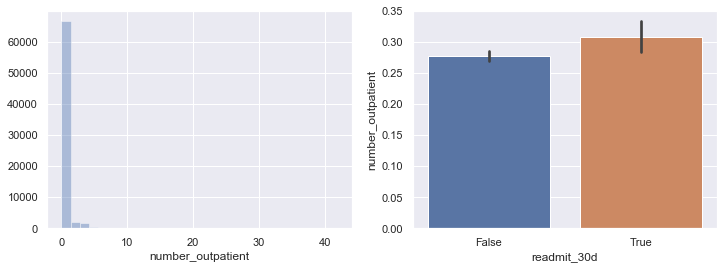

In [22]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['number_outpatient'], bins = 30, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_outpatient', ax = ax2)

number_emergency

In [23]:
diabetes_df['number_emergency'].value_counts()

0     65878
1      3942
2       798
3       243
4        96
5        33
6        26
8         9
7         8
10        5
9         4
11        2
37        1
13        1
16        1
20        1
25        1
42        1
Name: number_emergency, dtype: int64

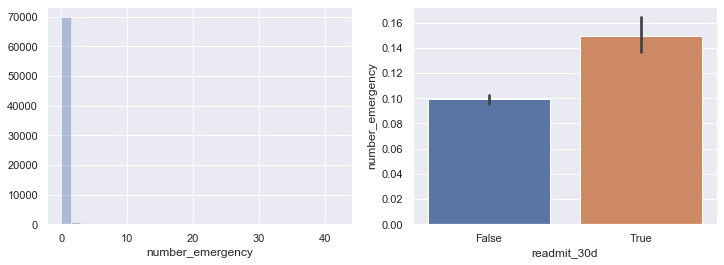

In [24]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['number_emergency'], bins = 30, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_emergency', ax = ax2)

number_inpatient

In [25]:
diabetes_df['number_inpatient'].value_counts()

0     62683
1      5913
2      1536
3       479
4       234
5       102
6        55
7        19
8        13
9         7
10        5
12        2
11        2
Name: number_inpatient, dtype: int64

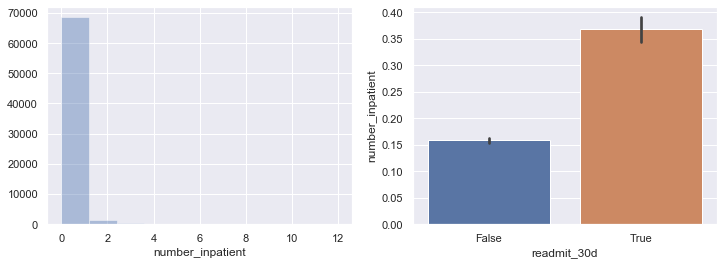

In [26]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['number_inpatient'], bins = 10, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_inpatient', ax = ax2)

diag_1

In [27]:
# removing the decimals from ICD9
diabetes_df['diag_1_main'] = diabetes_df['diag_1'].str.split('.', expand = True).drop(1, axis = 1)

In [28]:
diabetes_df['diag_1_main'].value_counts()

250    5787
414    5229
428    3946
786    3040
410    2884
       ... 
653       1
133       1
216       1
870       1
219       1
Name: diag_1_main, Length: 662, dtype: int64

In [29]:
diabetes_df['diag_1_diab'] = (diabetes_df['diag_1_main']=='250')

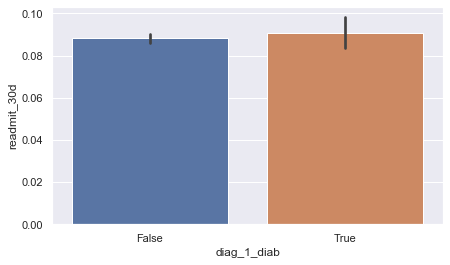

In [30]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_1_diab', y = 'readmit_30d')

diag_2

In [31]:
# removing decimals from ICD9
diabetes_df['diag_2_main'] = diabetes_df['diag_2'].str.split('.', expand = True).drop(1, axis = 1)

In [32]:
diabetes_df['diag_2_main'].value_counts()

250    9749
276    4562
428    4300
427    3521
401    3085
       ... 
917       1
908       1
832       1
V13       1
605       1
Name: diag_2_main, Length: 695, dtype: int64

In [33]:
diabetes_df['diag_2_diab'] = (diabetes_df['diag_2_main']=='250')

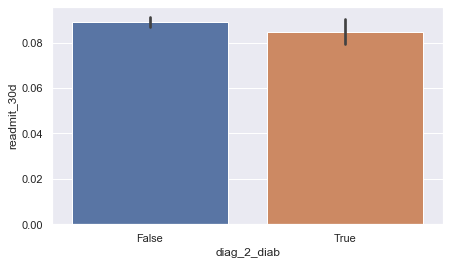

In [34]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_2_diab', y = 'readmit_30d')

diag_3

In [35]:
# removing decimals from ICD9
diabetes_df['diag_3_main'] = diabetes_df['diag_3'].str.split('.', expand = True).drop(1, axis = 1)

In [36]:
diabetes_df['diag_3_main'].value_counts()

250     12629
401      6580
276      3406
428      2822
427      2677
        ...  
E912        1
E853        1
27          1
148         1
602         1
Name: diag_3_main, Length: 725, dtype: int64

In [37]:
diabetes_df['diag_3_diab'] = (diabetes_df['diag_3_main']=='250')

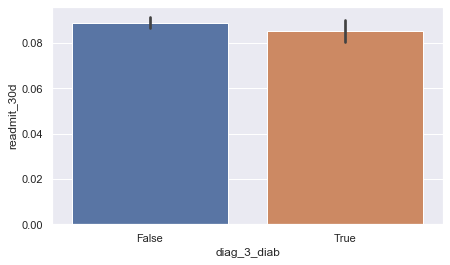

In [38]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_3_diab', y = 'readmit_30d')

top n primary diagnoses:

In [39]:
diabetes_df['diag_1_main'].value_counts().head(10)

250    5787
414    5229
428    3946
786    3040
410    2884
486    2421
427    2046
715    1908
434    1562
682    1470
Name: diag_1_main, dtype: int64

top n primary diagnoses when second diagnosis is diabetes:

In [40]:
diabetes_df.loc[diabetes_df['diag_2_main']=='250']['diag_1_main'].value_counts().head(10)

786    727
414    552
715    448
682    446
428    341
434    292
486    280
410    278
780    221
722    218
Name: diag_1_main, dtype: int64

top n primary diagnoses when second or additional second diagnosis is diabetes:

In [41]:
diabetes_df.loc[(diabetes_df['diag_2_main']=='250')|
                (diabetes_df['diag_3_main']=='250')]['diag_1_main'].value_counts().head(10)

414    1745
786    1447
715     971
428     951
410     751
486     738
682     720
434     607
427     521
491     485
Name: diag_1_main, dtype: int64

some ICD9 codes:

- 250 Diabetes mellitus
- 786 Symptoms involving respiratory system and other chest symptoms
- 414 Other forms of chronic ischemic heart disease
- 715 Osteoarthrosis and allied disorders
- 682 Other cellulitis and abscess
- 428 Heart failure
- 434 Occlusion of cerebral arteries
- 486 Pneumonia, organism unspecified
- 410 Acute myocardial infarction
- 780 General symptoms
- 722 Intervertebral disc disorders
- 427 Cardiac dysrhythmias

(786: Symptoms involving respiratory system and other chest symptoms)

In [42]:
diabetes_df['diag_786'] = (diabetes_df['diag_1_main']=='786')

In [43]:
diabetes_df['diag_786'].value_counts()

False    68010
True      3040
Name: diag_786, dtype: int64

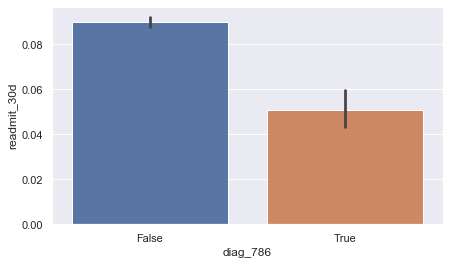

In [44]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_786', y = 'readmit_30d')

(414: other form of chronic ischemic heart diseases)

In [45]:
# diabetes_df['diag_414'] = ((diabetes_df['diag_1_main']=='414') |
#                            (diabetes_df['diag_2_main']=='414') |
#                            (diabetes_df['diag_3_main']=='414'))
diabetes_df['diag_414'] = (diabetes_df['diag_1_main']=='414')

In [46]:
diabetes_df['diag_414'].value_counts()

False    65821
True      5229
Name: diag_414, dtype: int64

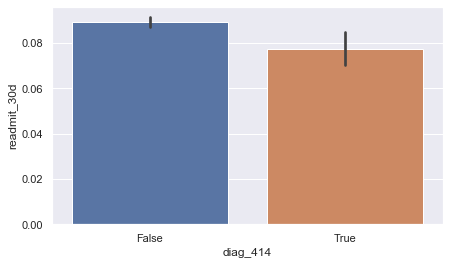

In [47]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_414', y = 'readmit_30d')

(715: Osteoarthrosis and allied disorders)

In [48]:
diabetes_df['diag_715'] = (diabetes_df['diag_1_main']=='715')

In [49]:
diabetes_df['diag_715'].value_counts()

False    69142
True      1908
Name: diag_715, dtype: int64

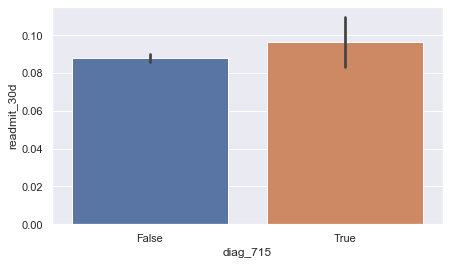

In [50]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_715', y = 'readmit_30d')

(682: Other cellulitis and abscess)

In [51]:
diabetes_df['diag_682'] = (diabetes_df['diag_1_main']=='682')

In [52]:
diabetes_df['diag_682'].value_counts()

False    69580
True      1470
Name: diag_682, dtype: int64

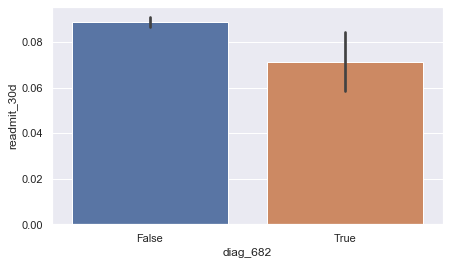

In [53]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_682', y = 'readmit_30d')

(428: Heart failure)

In [54]:
diabetes_df['diag_428'] = (diabetes_df['diag_1_main']=='428')

In [55]:
diabetes_df['diag_428'].value_counts()

False    67104
True      3946
Name: diag_428, dtype: int64

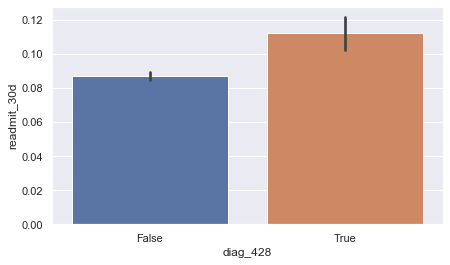

In [56]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_428', y = 'readmit_30d')

(410: Acute myocardial infarction)

In [57]:
diabetes_df['diag_410'] = (diabetes_df['diag_1_main']=='410')

In [58]:
diabetes_df['diag_410'].value_counts()

False    68166
True      2884
Name: diag_410, dtype: int64

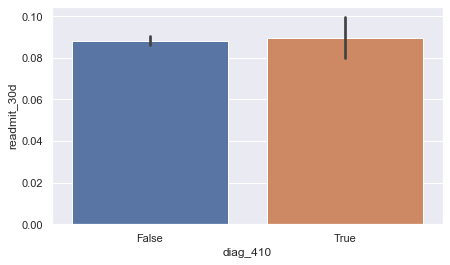

In [59]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_410', y = 'readmit_30d')

(427: Cardiac dysrhythmias)

In [60]:
diabetes_df['diag_427'] = (diabetes_df['diag_1_main']=='427')

In [61]:
diabetes_df['diag_427'].value_counts()

False    69004
True      2046
Name: diag_427, dtype: int64

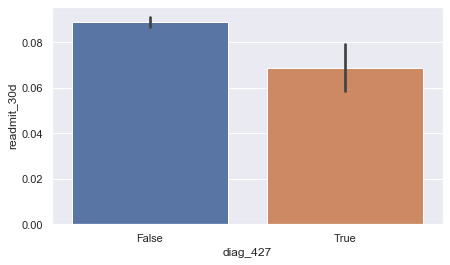

In [62]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_427', y = 'readmit_30d')

(comorbidity)

In [63]:
# will looking at this if there's time
# diabetes_df['comorbid'] = \
# diabetes_df['diag_1_main']+','+diabetes_df['diag_2_main']+','+diabetes_df['diag_3_main']

(250 in top 3 diagnoses)

In [64]:
diabetes_df['diag_250_top3'] = ((diabetes_df['diag_1_main']=='250') |
                           (diabetes_df['diag_2_main']=='250') |
                           (diabetes_df['diag_3_main']=='250'))
diabetes_df[diabetes_df['diag_250_top3']==False][['diag_1','diag_2','diag_3']]

,diag_1,diag_2,diag_3
6,414,411,V45
8,398,427,38
9,434,198,486
11,157,288,197
13,428,411,427
...,...,...,...
101752,348,784,782
101755,592,599,518
101756,996,585,403
101758,292,8,304


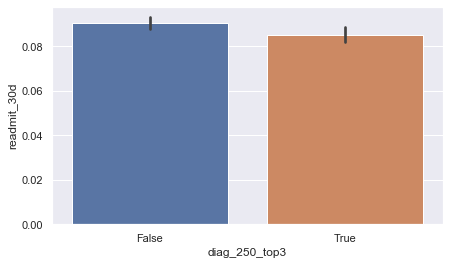

In [65]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_250_top3', y = 'readmit_30d')

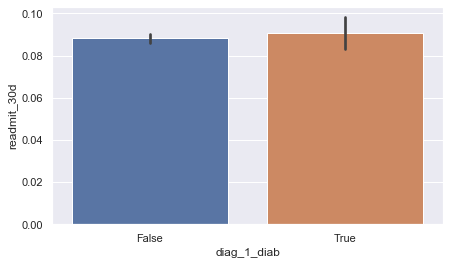

In [66]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_1_diab', y = 'readmit_30d')

number_diagnoses

In [67]:
diabetes_df['number_diagnoses'].value_counts()

9     31398
5      8926
6      7657
7      7574
8      7524
4      4458
3      2364
2       881
1       193
16       31
13       10
10        9
15        7
12        7
11        6
14        5
Name: number_diagnoses, dtype: int64

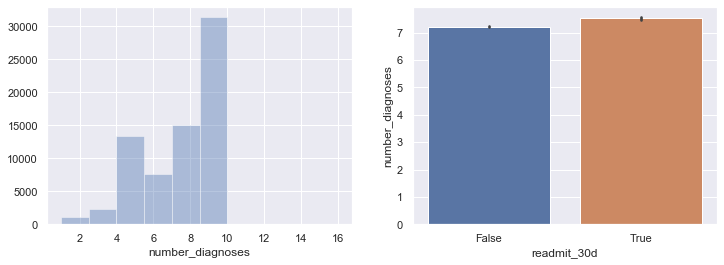

In [68]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['number_diagnoses'], bins = 10, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_diagnoses', ax = ax2)

max_glu_serum

In [69]:
diabetes_df['max_glu_serum'].value_counts()

None    67631
Norm     1714
>200      959
>300      746
Name: max_glu_serum, dtype: int64

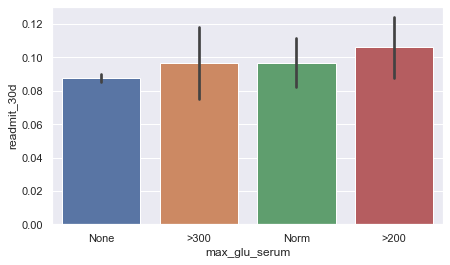

In [70]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'max_glu_serum', y = 'readmit_30d')

A1Cresult

In [71]:
diabetes_df['A1Cresult'].value_counts()

None    58098
>8       6294
Norm     3774
>7       2884
Name: A1Cresult, dtype: int64

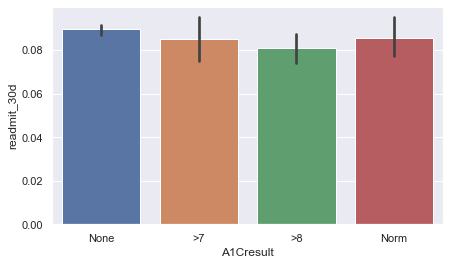

In [72]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'A1Cresult', y = 'readmit_30d')

metformin

In [73]:
diabetes_df['metformin'].value_counts()

No        56092
Steady    13689
Up          834
Down        435
Name: metformin, dtype: int64

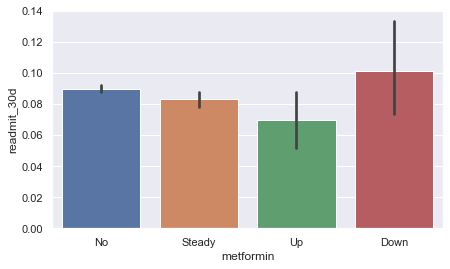

In [74]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'metformin', y = 'readmit_30d')

repaglinide

In [75]:
diabetes_df['repaglinide'].value_counts()

No        70129
Steady      822
Up           71
Down         28
Name: repaglinide, dtype: int64

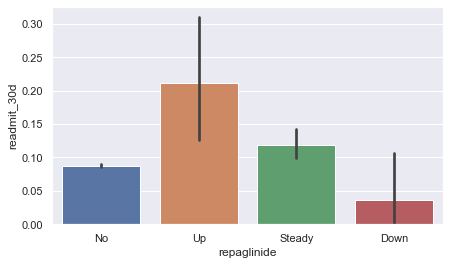

In [76]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'repaglinide', y = 'readmit_30d')

nateglinide

In [77]:
diabetes_df['nateglinide'].value_counts()

No        70554
Steady      472
Up           16
Down          8
Name: nateglinide, dtype: int64

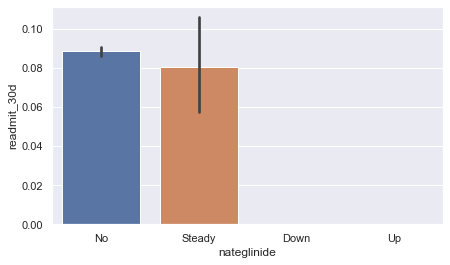

In [78]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'nateglinide', y = 'readmit_30d')

chlorpropamide

In [79]:
diabetes_df['chlorpropamide'].value_counts()

No        70978
Steady       67
Up            4
Down          1
Name: chlorpropamide, dtype: int64

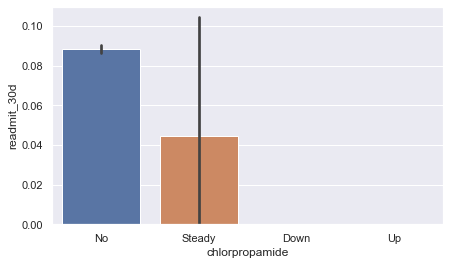

In [80]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'chlorpropamide', y = 'readmit_30d')

glimepiride

In [81]:
diabetes_df['glimepiride'].value_counts()

No        67321
Steady     3360
Up          233
Down        136
Name: glimepiride, dtype: int64

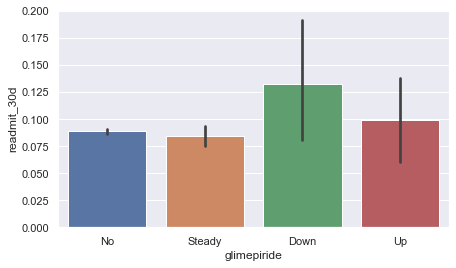

In [82]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'glimepiride', y = 'readmit_30d')

acetohexamide

In [83]:
diabetes_df['acetohexamide'].value_counts()

No        71049
Steady        1
Name: acetohexamide, dtype: int64

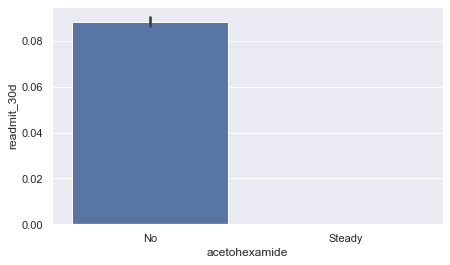

In [84]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'acetohexamide', y = 'readmit_30d')

glipizide

In [85]:
diabetes_df['glipizide'].value_counts()

No        61988
Steady     8112
Up          576
Down        374
Name: glipizide, dtype: int64

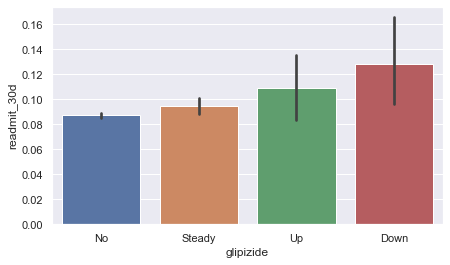

In [86]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'glipizide', y = 'readmit_30d')

tolbutamide

In [87]:
diabetes_df['tolbutamide'].value_counts()

No        71031
Steady       19
Name: tolbutamide, dtype: int64

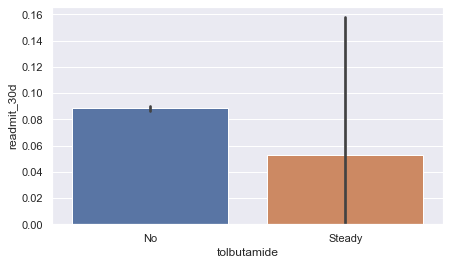

In [88]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'tolbutamide', y = 'readmit_30d')

pioglitazone

In [89]:
diabetes_df['pioglitazone'].value_counts()

No        65760
Steady     5029
Up          180
Down         81
Name: pioglitazone, dtype: int64

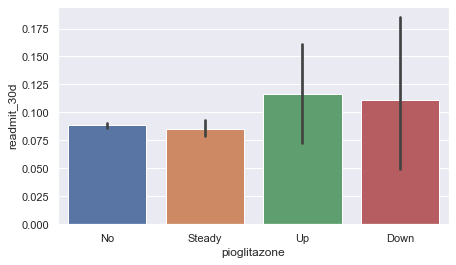

In [90]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'pioglitazone', y = 'readmit_30d')

rosiglitazone

In [91]:
diabetes_df['rosiglitazone'].value_counts()

No        66365
Steady     4476
Up          135
Down         74
Name: rosiglitazone, dtype: int64

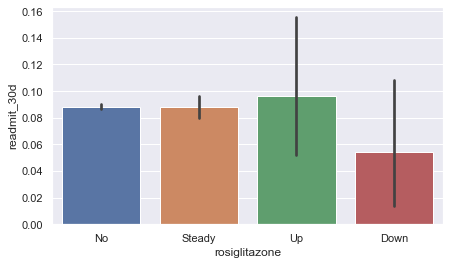

In [92]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'rosiglitazone', y = 'readmit_30d')

insulin

In [93]:
diabetes_df['insulin'].value_counts()

No        34715
Steady    21967
Down       7455
Up         6913
Name: insulin, dtype: int64

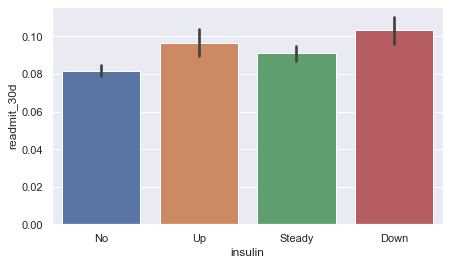

In [94]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'insulin', y = 'readmit_30d')

change

In [98]:
diabetes_df['time_in_hospital'].value_counts()

3     12633
2     12354
1     10683
4      9514
5      6788
6      5125
7      3964
8      2889
9      1960
10     1541
11     1210
12      944
13      785
14      660
Name: time_in_hospital, dtype: int64

In [99]:
diabetes_df['change'].value_counts()

No    39201
Ch    31849
Name: change, dtype: int64

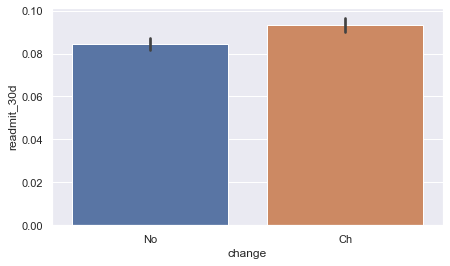

In [100]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'change', y = 'readmit_30d')

In [101]:
diabetes_df.race.value_counts()

Caucasian          53114
AfricanAmerican    12820
Hispanic            1511
Other               1167
Asian                493
Name: race, dtype: int64

In [102]:
diabetes_df.A1Cresult.value_counts()

None    58098
>8       6294
Norm     3774
>7       2884
Name: A1Cresult, dtype: int64

In [ ]:
diabetes_df.max_glu_serum.value_counts()